```
========================================================
                      CONTROLE DE VERSÃO
--------------------------------------------------------
Nome do Programador: Guilherme Santiago Mingarelli
Data de Criação: 2024-10-02
Última Atualização: 2024-10-02
Versão: 1.0.1
Descrição: [Otimizador de Rotas, usando OSMNX]
--------------------------------------------------------
Histórico de Alterações:
- v1.0.1 (2024-10-02): [Correção no código]
- v1.0.1 (2024-10-03): [Teste com diferentes endereços e ajuste no marcadores de partida e chegada]
- v1.0.1 (2024-10-04): [Comentar partes do código desenvolvido anteriormente]

1. Rua Augusta, 1155, Consolação, São Paulo, SP - 05074-000
2. Avenida Brigadeiro Luís Antônio, 1567, Bela Vista, São Paulo, SP - 01426-001
3. Rua Teodoro Sampaio, 1113, Pinheiros, São Paulo, SP - 04522-000
4. Rua Artur de Azevedo, 32, Pinheiros, São Paulo - SP, 05404-000
5. Rua Cardeal Arcoverde, 1053, Pinheiros, São Paulo, SP - 05433-010
6. Avenida Santo Amaro, 657, Moema, São Paulo, SP - 01503-001
7. Rua Bela Cintra, 1000, Cerqueira César, São Paulo, SP - 01310-100
8. Avenida Brigadeiro Luís Antônio, 144, Sé, São Paulo, SP - 04522-000
9. Rua Cardeal Arcoverde, 1644, Pinheiros, São Paulo, SP - 01310-100
10. Avenida São João, 1291, República, São Paulo, SP - 01426-001
========================================================
```


In [9]:
# O comando abaixo instala a biblioteca OSMnx, que é utilizada para
# trabalhar com dados geoespaciais obtidos do OpenStreetMap, permitindo
# a criação e análise de redes de ruas e infraestrutura urbana.

In [10]:
pip install osmnx

In [11]:
# Importa a biblioteca Folium, que é usada para criar mapas interativos em Python.
import folium

# Importa a biblioteca OSMnx, que facilita o download e a análise de dados geoespaciais da OpenStreetMap.
import osmnx as ox

In [12]:
# Configurações da biblioteca OSMnx.
# Ativa o uso de cache para armazenar dados baixados do OpenStreetMap localmente,
# melhorando a eficiência ao evitar downloads repetidos.
ox.config(use_cache=True,

           # Ativa o registro de logs no console, permitindo que o usuário veja
           # informações sobre as operações realizadas pela biblioteca, como
           # chamadas de rede e mensagens de erro, facilitando a depuração.
           log_console=True)

<ipython-input-12-b451b4967b11>:4: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True,


In [13]:
# Utiliza a função de geocodificação da biblioteca OSMnx para converter um endereço em coordenadas geográficas (latitude e longitude).
# Neste caso, busca as coordenadas do primeiro endereço fornecido.
coordenada_inicial = ox.geocoder.geocode("Rua Augusta, 1155, Consolação, São Paulo") #(-23.591372752030363, -46.644694016475164)   ox.geocoder.geocode("Rua dos Otonis, 49, Vila Clementino, São Paulo")
# Utiliza a função de geocodificação novamente para buscar as coordenadas do segundo endereço fornecido.
coordenada_final = ox.geocoder.geocode("Avenida Brigadeiro Luís Antônio, 1567, Bela Vista, São Paulo")  #(-23.59274732804329, -46.64665485698893)  ox.geocoder.geocode("Largo Senador Raul Cardoso, 283, Vila Clementino, São Paulo")

# Calcula o ponto médio entre as coordenadas inicial e final.
# A média das latitudes (coordenada_inicial[0] e coordenada_final[0])
# e das longitudes (coordenada_inicial[1] e coordenada_final[1]) é obtida.
point = ((coordenada_inicial[0] + coordenada_final[0]) / 2,
         (coordenada_inicial[1] + coordenada_final[1]) / 2)

In [14]:
# O código abaixo utiliza a função graph_from_place da biblioteca OSMnx para gerar um grafo
# representando a rede de ruas dirigíveis (network_type='drive') da cidade de São Paulo, Brasil.
# 'São Paulo, São Paulo, Brazil' é o nome do local que será pesquisado no OpenStreetMap.
# O resultado é armazenado na variável G, que contém a rede viária, representada como um grafo,
# onde os nós são interseções e as arestas são as ruas conectando esses nós.
G = ox.graph_from_place('São Paulo, São Paulo, Brazil', network_type = 'drive')

In [15]:
# Determina um novo ID para o nó de origem, que é um número que não está em uso na rede existente.
# O novo ID é igual ao maior ID de nó atual mais 1.
id_origem = max(G.nodes) + 1

# Adiciona um novo nó ao grafo 'G' com as coordenadas da localização inicial (coordenada_inicial).
# 'y' representa a latitude e 'x' representa a longitude.
G.add_node(id_origem, y=coordenada_inicial[0], x=coordenada_inicial[1])

# Determina um novo ID para o nó de destino, seguindo a mesma lógica para garantir que seja único.
id_destino = max(G.nodes) + 1

# Adiciona um novo nó ao grafo 'G' com as coordenadas da localização final (coordenada_final).
# 'y' representa a latitude e 'x' representa a longitude.
G.add_node(id_destino, y=coordenada_final[0], x=coordenada_final[1])

In [16]:
# Encontra a aresta mais próxima da rede 'G' em relação à coordenada inicial.
# As coordenadas são passadas na ordem (longitude, latitude) porque OSMnx espera esse formato.
# 'return_dist=True' faz com que a função retorne também a distância até a aresta encontrada.
orig_inicial, dist_inicial = ox.nearest_edges(G, coordenada_inicial[1], coordenada_inicial[0], return_dist=True)

# Encontra a aresta mais próxima da rede 'G' em relação à coordenada final.
# Novamente, as coordenadas são passadas na ordem (longitude, latitude).
# 'return_dist=True' retorna também a distância até a aresta encontrada.
orig_final, dist_final = ox.nearest_edges(G, coordenada_final[1], coordenada_final[0], return_dist=True)

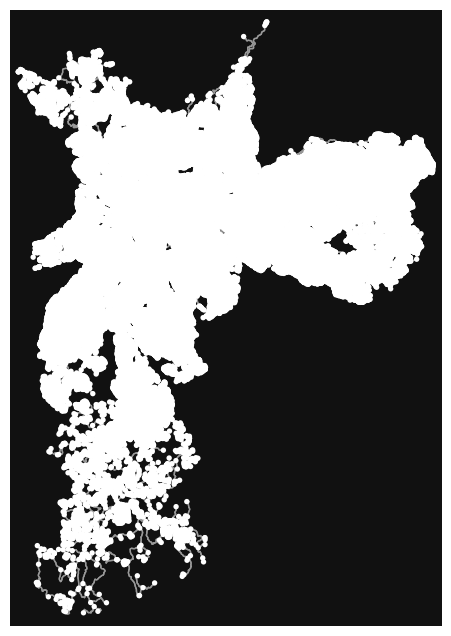

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
# Plota o grafo 'G', que representa a rede viária construída a partir das coordenadas e nós adicionados.
# A função 'plot_graph' da biblioteca OSMnx gera uma visualização gráfica da rede de ruas,
# permitindo que o usuário veja a disposição das ruas e a conexão entre os nós.
ox.plot_graph(G)

In [18]:
# Primeiro loop: percorre a lista 'orig_final', que contém identificadores de nós para o destino.
for i in range(0, len(orig_final)):

  # Verifica se o valor do identificador não é zero (assumindo que zero representa um valor inválido).
  if orig_final[i] != 0:

    # Armazena o valor do identificador atual na variável 'id'.
    id = orig_final[i]

    # Calcula a distância entre as coordenadas finais fornecidas (coordenada_final[0] e coordenada_final[1])
    # e as coordenadas do nó correspondente no grafo G (G.nodes()[id]['y'] e G.nodes()[id]['x']),
    # usando a função 'great_circle' da biblioteca OSMnx.
    distancia = ox.distance.great_circle(
        coordenada_final[0],
        coordenada_final[1],
        G.nodes()[id]['y'],
        G.nodes()[id]['x']
    )

    # Adiciona uma aresta no grafo G entre o nó de destino e o nó 'id', com a distância calculada como peso.
    G.add_edge(id_destino, id, length=distancia)

    # Adiciona uma aresta no sentido contrário, entre o nó 'id' e o nó de destino.
    G.add_edge(id, id_destino, length=distancia)

# Segundo loop: percorre a lista 'orig_inicial', que contém identificadores de nós para a origem.
for i in range(0, len(orig_inicial)):

  # Verifica se o valor do identificador não é zero (novamente, assumindo que zero é inválido).
  if orig_inicial[i] != 0:

    # Armazena o valor do identificador atual na variável 'id'.
    id = orig_inicial[i]

    # Calcula a distância entre as coordenadas iniciais fornecidas (coordenada_inicial[0] e coordenada_inicial[1])
    # e as coordenadas do nó correspondente no grafo G.
    distancia = ox.distance.great_circle(
        coordenada_inicial[0],
        coordenada_inicial[1],
        G.nodes()[id]['y'],
        G.nodes()[id]['x']
    )

    # Adiciona uma aresta no grafo G entre o nó de origem e o nó 'id', com a distância calculada como peso.
    G.add_edge(id_origem, id, length=distancia)

    # Adiciona uma aresta no sentido contrário, entre o nó 'id' e o nó de origem.
    G.add_edge(id, id_origem, length=distancia)

# Calcula a rota mais curta no grafo G entre o nó de origem e o nó de destino, utilizando o comprimento ('length') como critério de peso.
route = ox.routing.shortest_path(G, id_origem, id_destino, weight='length')

In [19]:
# O código abaixo exibe o conteúdo da variável 'route' no console.
# 'route' contém informações sobre uma rota específica,
# como uma lista de nós ou coordenadas que formam o caminho em uma rede de ruas.
print(route)

[12206043341, 1953466357, 1953466363, 60609673, 1953466367, 1953466354, 60609692, 1990911135, 1953466370, 1953466360, 151275041, 151275040, 457566749, 5691703360, 457566777, 457566778, 10886806485, 457593059, 142808171, 863898797, 457593200, 8765779194, 172020870, 457593263, 12206043342]


In [20]:
# Converte o grafo 'G' em dois GeoDataFrames: um para nós e outro para arestas.
# Como 'nodes=False' e 'edges=True', ele retornará apenas o GeoDataFrame de arestas.
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Extrai a geometria da rua (linha que conecta dois nós) associada à origem.
# A função 'edges['geometry']' retorna a geometria de todas as arestas, onde:
# 'orig_inicial[0]', 'orig_inicial[1]' e 'orig_inicial[2]' referenciam índices específicos para localizar uma aresta exata no DataFrame.
# A função 'coords' retorna as coordenadas da geometria (neste caso, uma linha) associada à aresta.
# Converte a geometria em uma lista de coordenadas da rua de origem.
rua_origem = list(edges['geometry'][orig_inicial[0]][orig_inicial[1]][orig_inicial[2]].coords)

# Extrai a geometria da rua associada ao destino, de maneira semelhante ao que foi feito para a origem.
# Os índices 'orig_final[0]', 'orig_final[1]' e 'orig_final[2]' localizam a rua do destino no GeoDataFrame.
# Converte a geometria em uma lista de coordenadas da rua de destino.
rua_destino = list(edges['geometry'][orig_final[0]][orig_final[1]][orig_final[2]].coords)

In [21]:
# A variável 'route_map' é inicializada como um mapa interativo utilizando a biblioteca Folium.
# O mapa é centrado nas coordenadas definidas pela variável 'point' e o nível de zoom inicial é 15,
# proporcionando uma visão detalhada do local. O parâmetro 'control_scale=True' adiciona uma escala no mapa.
route_map = folium.Map(location=point, control_scale=True, zoom_start=15)

# O primeiro marcador é adicionado ao mapa 'route_map' nas coordenadas iniciais (coordenada_inicial).
# O marcador é representado por um ícone azul (color='blue') com o símbolo de usuário (icon='user').
# Este marcador provavelmente indica o ponto de partida no mapa.
folium.Marker(location=[coordenada_inicial[0], coordenada_inicial[1]],
              icon=folium.Icon(color='blue', icon='user')).add_to(route_map)

# O segundo marcador é adicionado ao mapa 'route_map' nas coordenadas finais (coordenada_final).
# O marcador é representado por um ícone verde (color='green') com o símbolo de captura de tela (icon='screenshot'),
# indicando o ponto de destino no mapa.
folium.Marker(location=[coordenada_final[0], coordenada_final[1]],
              icon=folium.Icon(color='green', icon='screenshot')).add_to(route_map)

In [22]:
# Inicializa uma lista vazia chamada 'linha' que armazenará os pontos (coordenadas) da rota.
linha = []

# Loop que percorre os nós da rota 'route1', começando do segundo nó até o penúltimo.
# 'range(1, len(route) - 2)' garante que o loop percorra todos os nós intermediários da rota.
for j in range(1, len(route) - 2):

  # Extrai a geometria (coordenadas) da aresta entre os nós consecutivos 'route1[j]' e 'route1[j+1]'.
  # A função 'edges['geometry']' acessa a geometria da aresta entre esses dois nós, onde '0' refere-se
  # ao índice da primeira (e provavelmente única) linha na geometria dessa aresta.
  # 'coords' extrai as coordenadas da linha e 'list()' converte essas coordenadas em uma lista.
  temp = list(edges['geometry'][route[j]][route[j+1]][0].coords)

  # Itera sobre todas as coordenadas (pontos) extraídas para a aresta atual (entre 'route1[j]' e 'route1[j+1]').
  for k in range(0, len(temp)):

    # Adiciona cada ponto à lista 'linha', trocando a ordem das coordenadas de (x, y) para (y, x),
    # pois o folium espera que as coordenadas estejam no formato [latitude, longitude].
    # 'temp[k][1]' é a latitude e 'temp[k][0]' é a longitude.
    linha.append([temp[k][1], temp[k][0]])

# Desenha uma linha no mapa ('route_map') usando as coordenadas da lista 'linha'.
# 'locations=linha' define os pontos da linha, e 'color="#FF0000"' define a cor da linha (vermelho).
folium.PolyLine(locations=linha, color="#FF0000").add_to(route_map)

In [24]:
# A variável 'coordenadas_nodo' obtém as coordenadas (x, y) do penúltimo nó da rota ('route[-2]') do grafo 'G'.
coordenadas_nodo = G.nodes[route[-2]]

# Inicializa uma lista 'linha_destino' para armazenar os pontos da linha de destino que será desenhada.
linha_destino = []

# Verifica se o primeiro ponto de 'rua_destino' coincide com as coordenadas do nó atual.
if rua_destino[0][0] == coordenadas_nodo['x'] and rua_destino[0][1] == coordenadas_nodo['y']:
  # Percorre os pontos em 'rua_destino' para calcular a distância entre os pontos da rota e as coordenadas finais.
  for i in range(0, len(rua_destino)):
    # Calcula a distância entre 'coordenada_final' e os pontos em 'rua_destino' usando a fórmula do círculo máximo.
    ponto_origem = ox.distance.great_circle(coordenada_final[1], coordenada_final[0], rua_destino[i][0], rua_destino[i][1])

    # Verifica se a distância atual é maior que a distância do ponto anterior ou se a distância é zero.
    if i > 0 and ponto_origem > ponto_antecessor or ponto_origem == 0:
      # Se a condição for verdadeira, adiciona 'coordenada_final' à linha de destino e encerra o loop.
      linha_destino.append([coordenada_final[0], coordenada_final[1]])
      break

    # Adiciona o ponto atual de 'rua_destino' à lista 'linha_destino'.
    linha_destino.append([rua_destino[i][1], rua_destino[i][0]])

    # Atualiza a variável 'ponto_antecessor' com a distância atual para a próxima iteração.
    ponto_antecessor = ponto_origem
else:
  # Caso as coordenadas não coincidam, adiciona 'coordenada_final' e o último ponto de 'rua_destino' à linha de destino.
  linha_destino.append([coordenada_final[0], coordenada_final[1]])
  linha_destino.append([rua_destino[-1][1], rua_destino[-1][0]])

# Se a lista 'linha_destino' não estiver vazia, desenha uma linha vermelha no mapa ('route_map') com os pontos da lista.
if len(linha_destino) > 0:
  folium.PolyLine(locations=linha_destino, color="#FF0000").add_to(route_map)


# A variável 'coordenadas_nodo' agora obtém as coordenadas do segundo nó da rota ('route[1]').
coordenadas_nodo = G.nodes[route[1]]

# Inicializa uma lista 'linha_origem' para armazenar os pontos da linha de origem que será desenhada.
linha_origem = []

# Verifica se o primeiro ponto de 'rua_origem' coincide com as coordenadas do nó atual.
if rua_origem[0][0] == coordenadas_nodo['x'] and rua_origem[0][1] == coordenadas_nodo['y']:
  # Percorre os pontos em 'rua_origem' para calcular a distância entre os pontos da rota e as coordenadas iniciais.
  for i in range(0, len(rua_origem)):
    # Calcula a distância entre 'coordenada_inicial' e os pontos em 'rua_origem' usando a fórmula do círculo máximo.
    ponto_origem = ox.distance.great_circle(coordenada_inicial[1], coordenada_inicial[0], rua_origem[i][0], rua_origem[i][1])

    # Verifica se a distância atual é maior que a distância do ponto anterior ou se a distância é zero.
    if i > 0 and ponto_origem > ponto_antecessor or ponto_origem == 0:
      # Se a condição for verdadeira, adiciona 'coordenada_inicial' à linha de origem e encerra o loop.
      linha_origem.append([coordenada_inicial[0], coordenada_inicial[1]])
      break

    # Adiciona o ponto atual de 'rua_origem' à lista 'linha_origem'.
    linha_origem.append([rua_origem[i][1], rua_origem[i][0]])

    # Atualiza a variável 'ponto_antecessor' com a distância atual para a próxima iteração.
    ponto_antecessor = ponto_origem

else:
  # Caso as coordenadas não coincidam, adiciona 'coordenada_inicial' e o último ponto de 'rua_origem' à linha de origem.
  linha_origem.append([coordenada_inicial[0], coordenada_inicial[1]])
  linha_origem.append([rua_origem[-1][1], rua_origem[-1][0]])

# Se a lista 'linha_origem' não estiver vazia, desenha uma linha vermelha no mapa ('route_map') com os pontos da lista.
if len(linha_origem) > 0:
  folium.PolyLine(locations=linha_origem, color="#FF0000").add_to(route_map)

In [25]:
# A variável 'route_map' é um objeto da biblioteca Folium,
# utilizado para criar um mapa interativo que será visualizado em um navegador.
# Esse objeto pode estar configurado anteriormente com uma localização inicial (centro do mapa)
# e um nível de zoom específico. A seguir, elementos como rotas, marcadores, e outros
# objetos geoespaciais serão adicionados ao mapa conforme o código avança.
# No final, o mapa poderá ser exibido com todas as rotas e informações adicionadas, como linhas,
# polilinhas e pontos específicos. O Folium usa dados geográficos para renderizar o mapa
# e manipula-os de forma interativa, facilitando a visualização.
route_map

In [26]:
# O código abaixo salva o mapa interativo armazenado na variável 'route_map' em um arquivo HTML.
# O arquivo 'route.html' conterá o mapa com todas as rotas, linhas e elementos visuais que foram
# adicionados ao objeto 'route_map' durante a execução do código.
# Esse arquivo HTML pode ser aberto em qualquer navegador para visualizar o mapa de forma interativa.
route_map.save('route.html')